In [243]:
#探索AlienVault信誉集

In [244]:
import os
import sys
import pandas as pd

In [245]:
#准备下载信誉集
import urllib
import os.path

avURL = "http://datadrivensecurity.info/book/ch03/data/reputation.data"
avRep = "reputation.data"

if not os.path.isfile("reputation.data"):
    urllib.urlretrieve(avURL,avRep)

In [246]:
av = pd.read_csv('reputation.data',sep= '#')
av.head(10)

,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
0,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
3,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
4,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11
5,222.76.212.173,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
6,222.76.212.172,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
7,222.76.212.171,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
8,174.142.46.19,6,3,Spamming,NaN,NaN,"24.4797992706,118.08190155",12
9,66.2.49.244,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11


In [247]:
av.columns=['IP','Reliability','Risk','Type','Country','Locale','Coords','x']
print av.head(10)
print "################################################"
av.head(10).to_csv(sys.stdout)
print "################################################"
from IPython.display import HTML
HTML(av.head(10).to_html())

               IP  Reliability  Risk           Type Country      Locale  \
0  222.76.212.185            4     2  Scanning Host      CN      Xiamen   
1  222.76.212.186            4     2  Scanning Host      CN      Xiamen   
2     5.34.246.67            6     3       Spamming      US         NaN   
3   178.94.97.176            4     5  Scanning Host      UA      Merefa   
4     66.2.49.232            4     2  Scanning Host      US  Union City   
5  222.76.212.173            4     2  Scanning Host      CN      Xiamen   
6  222.76.212.172            4     2  Scanning Host      CN      Xiamen   
7  222.76.212.171            4     2  Scanning Host      CN      Xiamen   
8   174.142.46.19            6     3       Spamming     NaN         NaN   
9     66.2.49.244            4     2  Scanning Host      US  Union City   

                         Coords   x  
0    24.4797992706,118.08190155  11  
1    24.4797992706,118.08190155  11  
2                    38.0,-97.0  12  
3   49.8230018616,36.0

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
3,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
4,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11
5,222.76.212.173,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
6,222.76.212.172,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
7,222.76.212.171,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
8,174.142.46.19,6,3,Spamming,NaN,NaN,"24.4797992706,118.08190155",12
9,66.2.49.244,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11


In [248]:
print av['Reliability'].describe()
print "################################################"
print av['Risk'].describe()
print "################################################"
print pd.Categorical(av['Reliability'])
print "################################################"
print pd.Categorical(av['Risk'])

count    258625.000000
mean          2.798036
std           1.130419
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: Reliability, dtype: float64
################################################
count    258625.000000
mean          2.221363
std           0.531572
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Risk, dtype: float64
################################################
[4, 4, 6, 4, 4, ..., 4, 4, 3, 3, 3]
Length: 258625
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]
################################################
[2, 2, 3, 5, 2, ..., 2, 2, 2, 2, 3]
Length: 258625
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]


In [249]:
#分类统计并且查看
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.value_counts(col).reindex(factor.categories)
#Categorical.from_array()已经停用
#levels属性已经停用，该给categories

In [250]:
print factor_col(av['Reliability'])
print "################################################"
print factor_col(av['Risk'])
print "################################################"
print factor_col(av['Type'])
print "################################################"
print factor_col(av['Country'])

1       5612
2     149117
3      10892
4      87039
5          7
6       4758
7        297
8         21
9        686
10       196
Name: Reliability, dtype: int64
################################################
1        39
2    213851
3     33719
4      9588
5      1328
6        90
7        10
Name: Risk, dtype: int64
################################################
APT;Malware Domain                          1
C&C                                       610
C&C;Malware Domain                         31
C&C;Malware IP                             20
C&C;Scanning Host                           7
Malicious Host                           3770
Malicious Host;Malware Domain               4
Malicious Host;Malware IP                   2
Malicious Host;Scanning Host              163
Malware Domain                           9274
Malware Domain;C&C                         25
Malware Domain;Malicious Host               4
Malware Domain;Malware IP                 173
Malware Domain;Scanning Host     

CN    0.265179
US    0.194826
TR    0.053970
DE    0.038484
NL    0.030666
RU    0.024537
GB    0.024333
IN    0.021189
FR    0.021069
TW    0.017009
Name: Country, dtype: float64

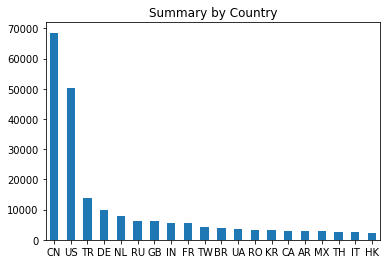

In [251]:
#绘图查看
#counrty
import matplotlib.pyplot as plt
country_ct = pd.value_counts(av['Country'],sort=True)
country_ct[0:20].plot(kind='bar',rot=0,title='Summary by Country')
#计算比例
top10 = country_ct[0:10]
top10.astype(float)/len(av['Country'])

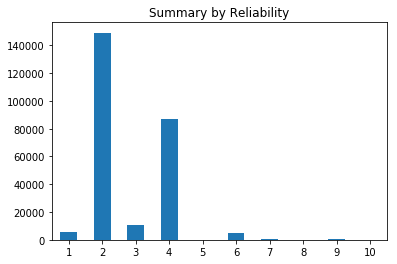

In [252]:
#Reliability
factor_col(av['Reliability']).plot(kind='bar',rot=0,title='Summary by Reliability')

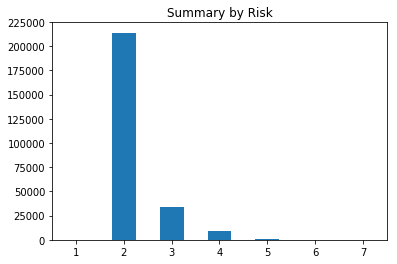

In [253]:
#Risk
factor_col(av['Risk']).plot(kind='bar',rot=0,title = 'Summary by Risk')

In [254]:
#通过热力图寻找Risk和Reliability之间的关系
from matplotlib import cm
from numpy import arange
pd.crosstab(av['Risk'],av['Reliability'])

Reliability,1,2,3,4,5,6,7,8,9,10
Risk,,,,,,,,,,
1,0,0,16,7,0,8,8,0,0,0
2,804,149114,3670,57652,4,2084,85,11,345,82
3,2225,3,6668,22168,2,2151,156,7,260,79
4,2129,0,481,6447,0,404,43,2,58,24
5,432,0,55,700,1,103,5,1,20,11
6,19,0,2,60,0,8,0,0,1,0
7,3,0,0,5,0,0,0,0,2,0


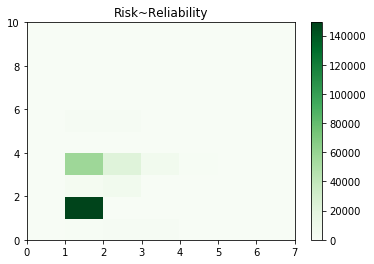

In [255]:
xtab = pd.crosstab(av['Reliability'],av['Risk'])
plt.pcolor(xtab,cmap=cm.Greens)
plt.title('Risk~Reliability')
plt.colorbar()

In [256]:
#现在查看Reliability与Risk与Type的关系。
av['newtype'] = av['Type']
pd.value_counts(av['newtype'].str.contains(';'))

False    257791
True        834
Name: newtype, dtype: int64

In [257]:
#有834个记录的Type有多个量，即同时存在多种攻击行为
av[av['newtype'].str.contains(';')] = "Multiples"
av.sample(10)

,IP,Reliability,Risk,Type,Country,Locale,Coords,x,newtype
95015,81.27.245.82,4,2,Scanning Host,RU,Tver,"56.8605003357,35.8759994507",11,Scanning Host
32884,78.225.83.44,2,2,Scanning Host,FR,Argenteuil,"48.9393997192,2.23670005798",11,Scanning Host
168182,54.218.167.173,2,2,Scanning Host,US,Woodbridge,"40.5525016785,-74.2914962769",11,Scanning Host
150030,198.50.154.176,6,3,Malware IP,US,Newark,"40.7355003357,-74.1741027832",7,Malware IP
174959,188.165.164.160,2,2,Scanning Host,FR,NaN,"46.0,2.0",11,Scanning Host
74374,129.177.205.145,4,2,Scanning Host,NO,Bergen,"60.3911018372,5.32469987869",11,Scanning Host
247468,182.18.162.59,4,3,Malicious Host,IN,NaN,"20.0,77.0",3,Malicious Host
41692,142.0.37.184,2,2,Scanning Host,US,Clarks Summit,"41.448600769,-75.7279968262",11,Scanning Host
6779,190.6.141.55,4,4,Scanning Host,DO,Santo Domingo,"18.4666996002,-69.9000015259",11,Scanning Host
184841,174.122.153.39,4,2,Scanning Host,US,Houston,"29.7523002625,-95.3669967651",11,Scanning Host


In [258]:
typ = av['newtype']
rel = av['Reliability']
ris = av['Risk']
xtab = pd.crosstab(typ,[rel,ris],rownames=['typ'],colnames=['rel','ris'])
print xtab.to_string()


rel                     1                               2      3                          4                                  5        6                        7                  8             9                     10            Multiples
ris                     2     3     4    5   6  7       2  3   1     2     3    4   5  6  1      2      3     4    5   6  7  2  3  5  1    2    3    4   5  6  1   2    3   4  5  2  3  4  5    2    3   4   5  6  7   2   3   4  5 Multiples
typ                                                                                                                                                                                                                                          
C&C                     0     0     1    2   1  0       0  0   0     0     0  313  22  2  0      0      0    15   22   4  1  0  0  1  0    0    0   98  60  5  0   0    0   7  3  0  0  1  1    0    0  19  16  1  1   0   1   8  5         0
Malicious Host          0     6    51   41   8  

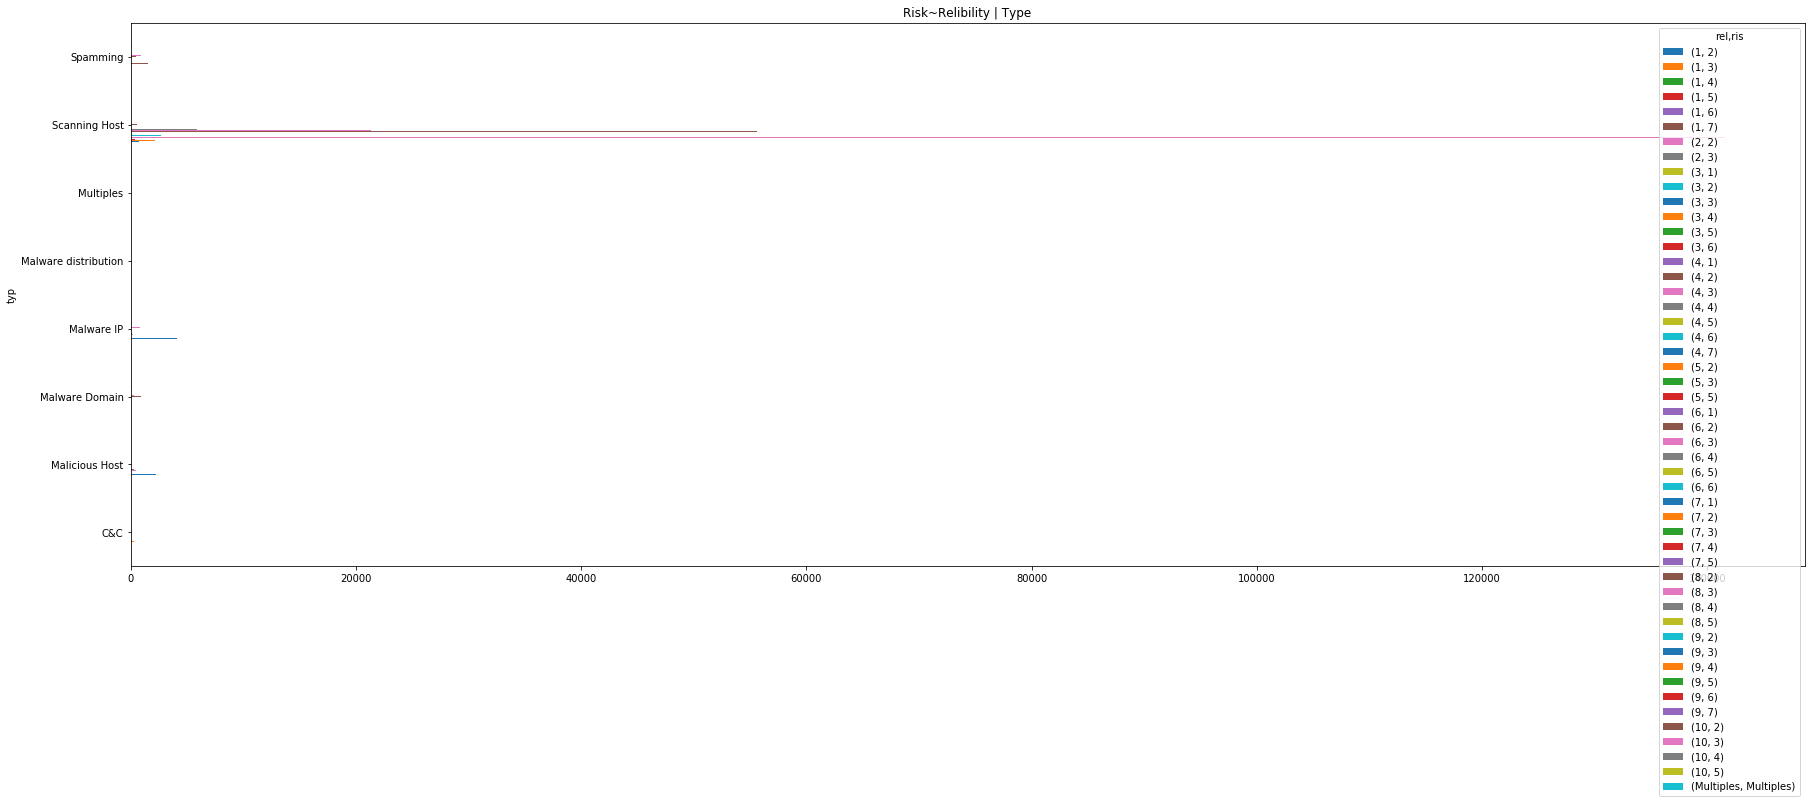

In [259]:
xtab.plot(rot=0,kind='barh',legend='False',title="Risk~Relibility | Type",figsize=(30,10))

In [272]:
#可以看到由于大量数据集中在 scanning host 这个类型中。查看其与Risk的关系，若不高可删除。
xtab = pd.crosstab(av['newtype'],av['Risk'])
print xtab

Risk                   1       2      3     4    5   6  7  Multiples
newtype                                                             
C&C                    0       0      1   462  132  13  2          0
Malicious Host         2     362   2778   402  185  38  3          0
Malware Domain         7    8818    407    39    3   0  0          0
Malware IP            21     558   5389   393   79  26  4          0
Malware distribution   0       0      1     0    0   0  0          0
Multiples              0       0      0     0    0   0  0        834
Scanning Host          9  201435  23802  8052  868  13  0          0
Spamming               0    2153   1120   171   43   0  0          0


In [273]:
#由于Multiples类的行为具有多个值的Risk，并总数不多，此处暂时删除
del xtab['Multiples']
print xtab

Risk                   1       2      3     4    5   6  7
newtype                                                  
C&C                    0       0      1   462  132  13  2
Malicious Host         2     362   2778   402  185  38  3
Malware Domain         7    8818    407    39    3   0  0
Malware IP            21     558   5389   393   79  26  4
Malware distribution   0       0      1     0    0   0  0
Multiples              0       0      0     0    0   0  0
Scanning Host          9  201435  23802  8052  868  13  0
Spamming               0    2153   1120   171   43   0  0


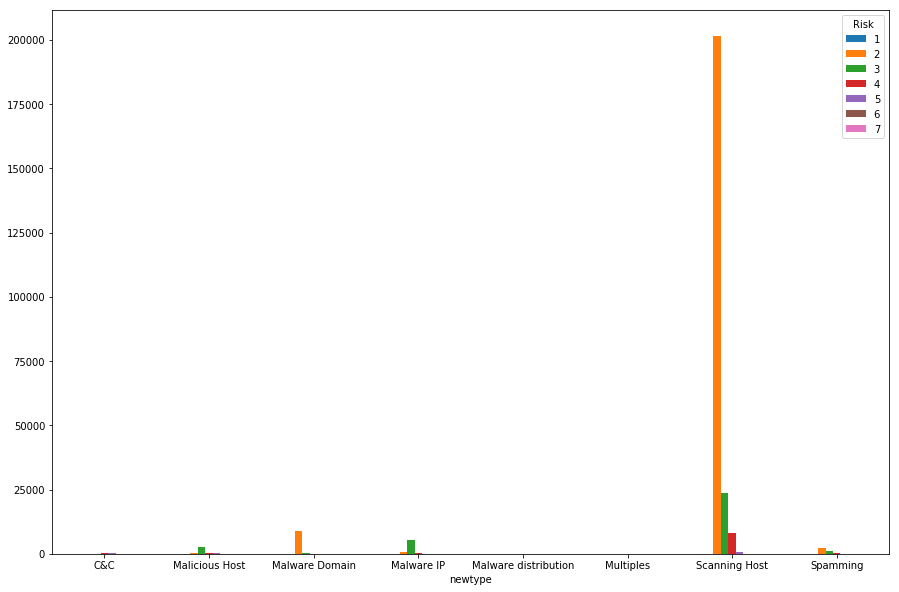

In [276]:
xtab.plot(kind='bar',rot=0,figsize=(15,10))

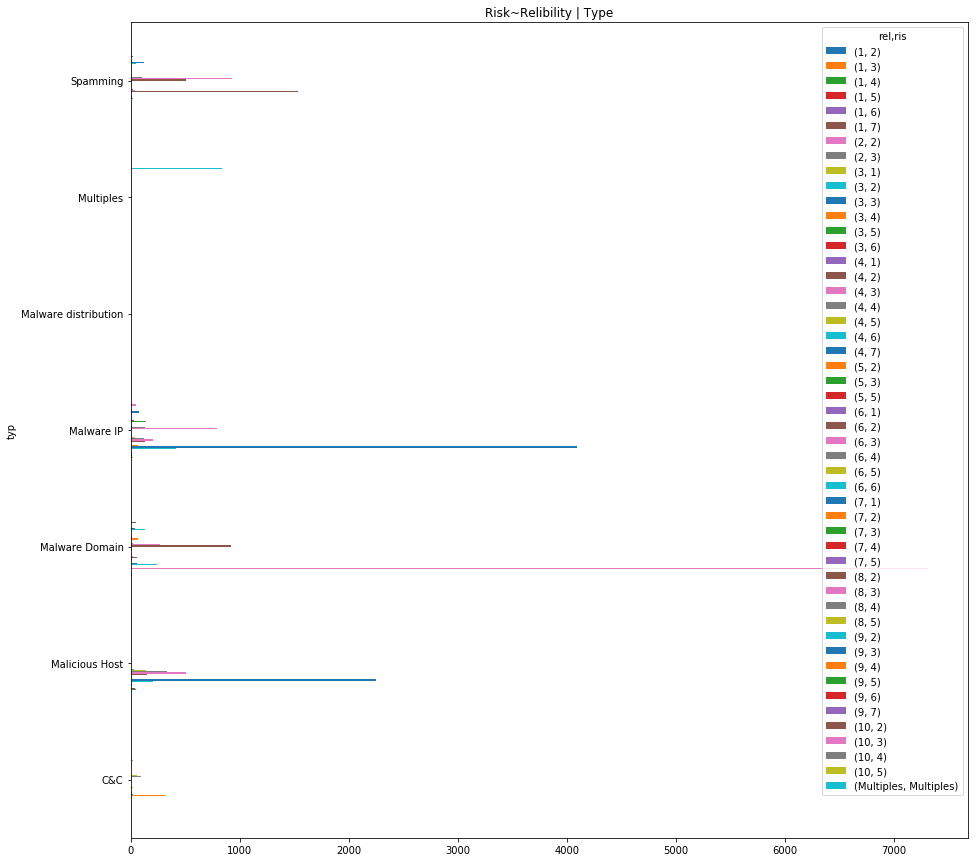

In [289]:
#对比scanning hosts与其他Type可以看到其数量过大，且绝大多数为低等级的Risk（2），因此应当单独分析
#回到Risk~Relibility | Type图中
rrt_df = av[av['newtype'] != "Scanning Host"]
typ = rrt_df['newtype']
rel = rrt_df['Reliability']
ris = rrt_df['Risk']
xtab = pd.crosstab(typ,[rel,ris],rownames=['typ'],colnames=['rel','ris'])

xtab.plot(rot=0,kind='barh',legend='False',title="Risk~Relibility | Type",figsize=(15,15))